## Sterling E-Commerce Sales Optimization Analysis (By Targeting Market Preference)

A deep dive into the world of e-commerce strategy. In this comprehensive study, we explore the invaluable realm of target marketing preferences and customer desires. Through meticulous data analysis, and unsupervised machine learning model to classify the customers into segment, we uncover insights crucial for crafting tailored marketing strategies and services. By aligning our efforts with customer expectations, we aim to boost sales and drive success in the ever-evolving e-commerce landscape. Join us as we uncover the secrets to delivering precisely what customers want and enhancing our market presence.

In [1]:
# import libraries

# data analysis
import numpy as np
import pandas as pd
 
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# classifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data set
df = pd.read_excel("Sterling E-Commerce Data.xlsx")
df.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9


<span style="color:red">
    <h3>Limitations in the Dataset</h3>
    The dataset used as the case study presents certain limitations that need to be considered when interpreting the results and drawing conclusions. While the data dictionary provides valuable information about the variables but lacks their definitions, it lacks essential details related to the domain knowledge of the company or industry under investigation.
Conclusively, without a comprehensive understanding of the specific context in which the data was collected, some important aspects remain obscured. For instance, the dataset did not capture all relevant factors that impact the industry's performance, potentially leading to biased or incomplete analyses.</span>

In [3]:
df.shape

(283083, 19)

In [4]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [5]:
df.describe()

,Cust Id,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283083.000000,283083.000000,2.830780e+05,283083.000000,283083.000000,283083.000000,283083.000000
mean,70106.816026,741747.110628,1.004570e+08,561107.885991,49147.171374,3.008224,816.230712
std,30215.394879,95664.609013,6.090992e+04,256101.205409,27235.561738,4.565168,1986.164932
min,4.000000,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,659898.500000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,742471.000000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,826078.500000,1.005134e+08,782211.000000,72004.000000,3.000000,800.000000
max,115326.000000,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000


In [6]:
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

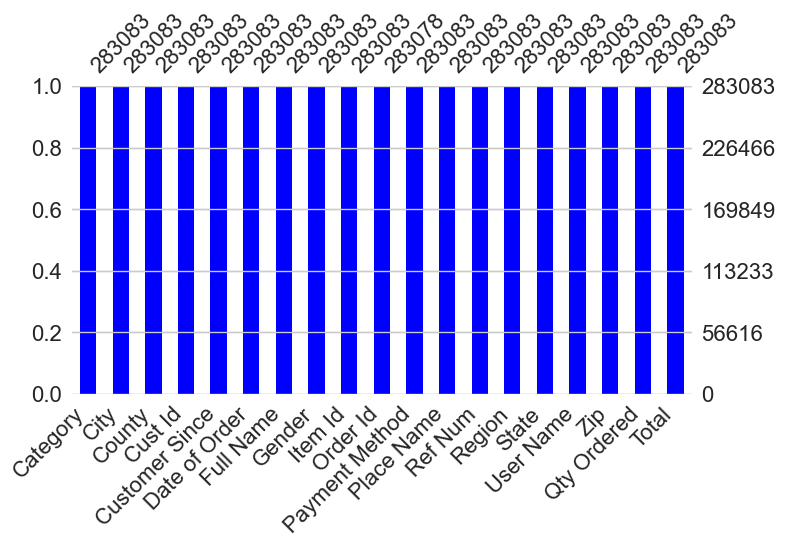

In [7]:
msno.bar(df, color="blue", figsize=(8,4));

##### Running Check on the Column with missing number

In [8]:
df[df["Order Id"].isnull()]

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
38758,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879766,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,2,36.0
38759,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879765,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,3,45.0
133217,Mobiles & Tablets,Rock Point,Charles,92075,2014-04-08,2022-04-01,"Torkelson, Berneice",F,767619,NaN,cod,Rock Point,715389,South,MD,bttorkelson,20682,2,2919.9
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2017-02-23,2022-07-21,"Cannon, Shamika",F,872703,NaN,cod,Uniopolis,406105,Midwest,OH,svcannon,45888,2,578.9
224999,Computing,Barrington,Camden,40853,2009-08-24,2022-08-12,"Robichaux, Marion",M,883358,NaN,cod,Barrington,986961,Northeast,NJ,mjrobichaux,8007,2,39.9


In [9]:
df["Total"].nlargest(10)

38265     101262.59
803        81500.00
249677     63888.50
221508     55500.00
221509     55500.00
221515     55500.00
221507     52900.00
221512     52605.00
221513     52605.00
221514     52605.00
Name: Total, dtype: float64

##### Will be droping the 5 rows with missing values

In [10]:
rows_to_drop = [38758, 38759, 133217, 145889, 224999]
df.drop(index=rows_to_drop, inplace=True)
df.shape

(283078, 19)

In [11]:
 df.nunique()

Category              15
City               15668
County              2518
Cust Id            63646
Customer Since     11629
Date of Order        365
Full Name          63610
Gender                 2
Item Id           283078
Order Id          199329
Payment Method        13
Place Name         15668
Ref Num            61505
Region                 4
State                 49
User Name          63407
Zip                33440
Qty Ordered           72
Total              23588
dtype: int64

### Exploratory Analysis

In [12]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

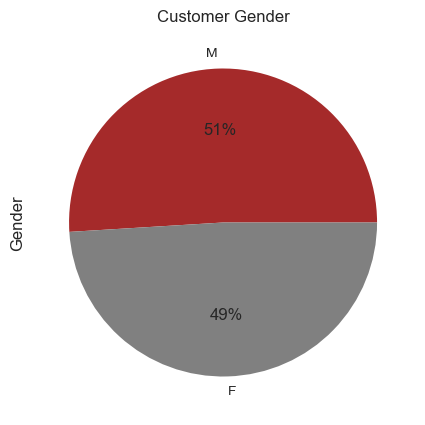

In [13]:
df["Gender"].value_counts().plot(kind="pie", autopct="%1.0f%%", figsize=(5,5), colors=["brown","gray"],title="Customer Gender");

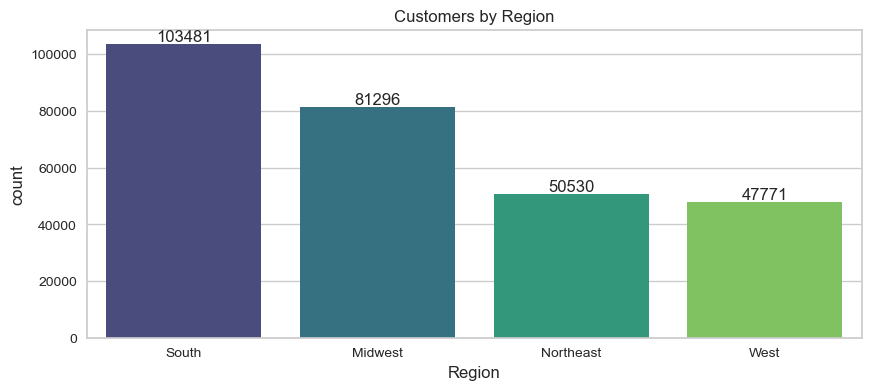

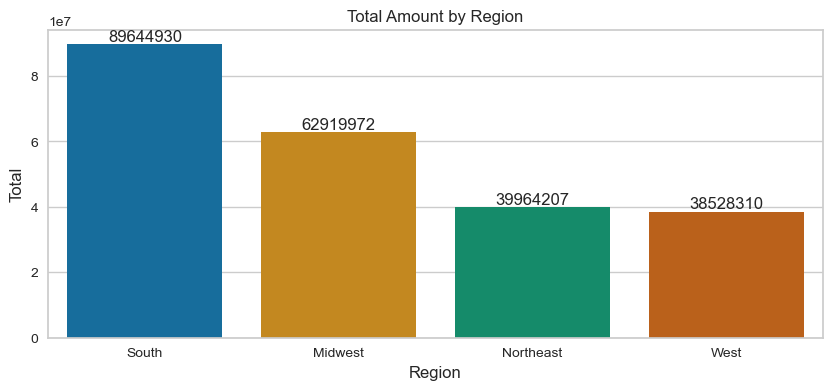

In [14]:
# visualizing the Region of Customer
plt.figure(figsize=(10,4))
Region=sns.countplot(x=df["Region"], palette= "viridis", order=df["Region"].value_counts(ascending=False).index)
values=df["Region"].value_counts(ascending=False).values
Region.bar_label(container= Region.containers[0], labels=values)
plt.xlabel("Region")
#plt.ylabel("Count Region")
Region.set_title("Customers by Region");


plt.figure(figsize=(10,4))
Region = df.groupby("Region")["Total"].sum().reset_index()
values = df["Region"].value_counts(ascending=False).values
Region = Region.sort_values(by="Total", ascending=False) # Sort the DataFrame in descending order based on the Charges column
Regions = sns.barplot(x="Region", data=Region, y="Total", palette="colorblind", order=Region["Region"])
for i, value in enumerate(Region['Total']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.title("Total Amount by Region")
plt.show()

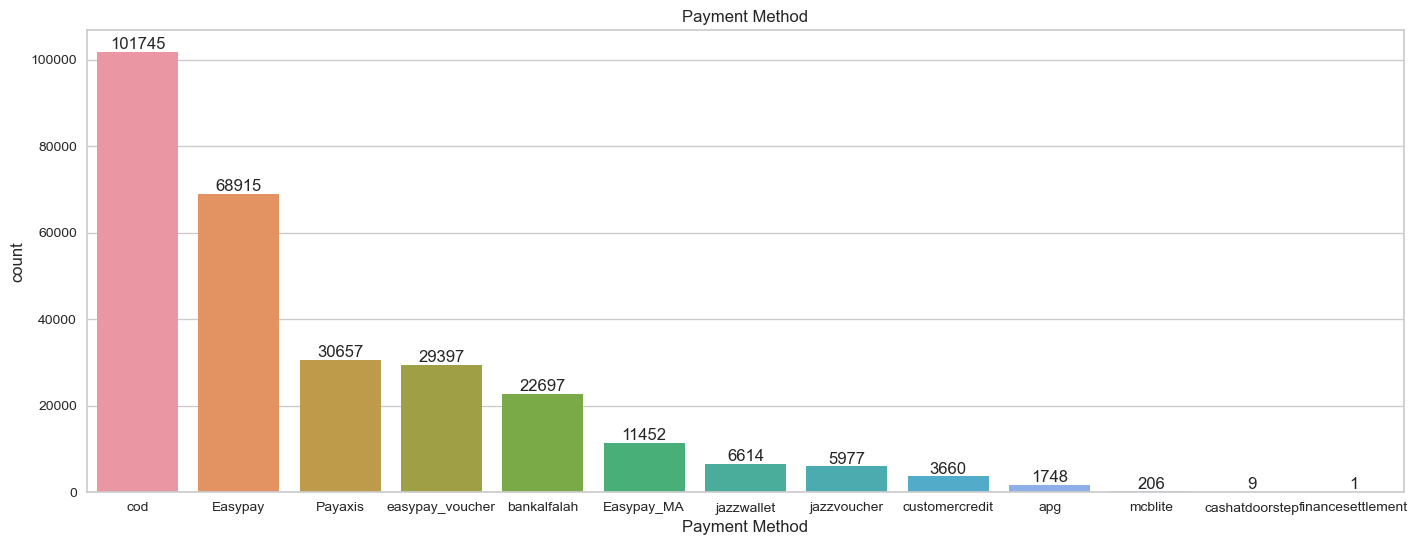

In [15]:
# visualizing the Payment Method of Customer
plt.figure(figsize=(17,6))
Payment_Method=sns.countplot(x=df["Payment Method"], order=df["Payment Method"].value_counts(ascending=False).index)
values=df["Payment Method"].value_counts(ascending=False).values
Payment_Method.bar_label(container= Payment_Method.containers[0], labels=values)
plt.xlabel("Payment Method")
#plt.ylabel("Count Payment Method")
Payment_Method.set_title("Payment Method");

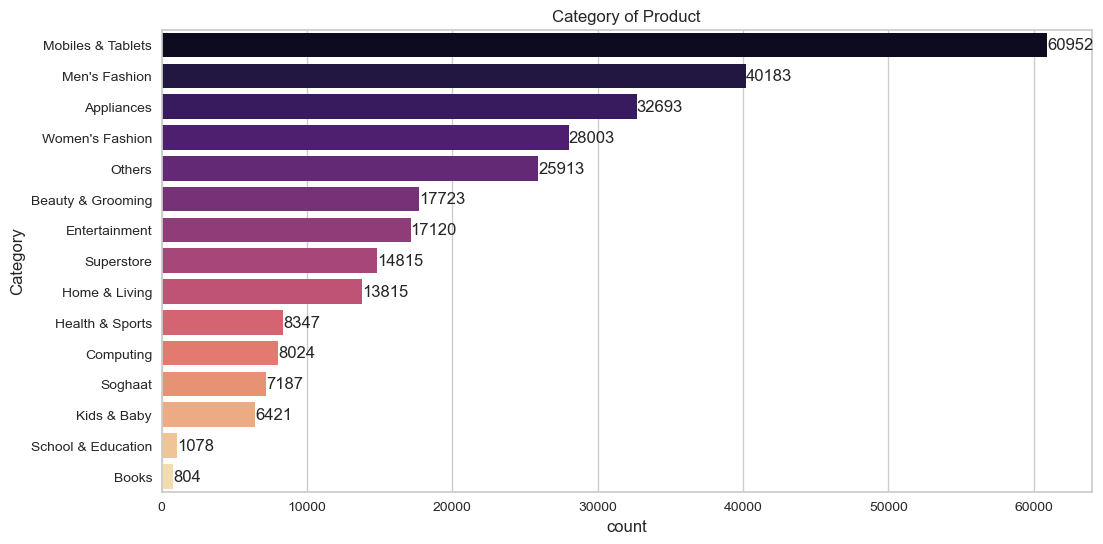

In [16]:
plt.figure(figsize = (12,6))
sales = sns.countplot(y=df["Category"], palette= "magma", order=df["Category"].value_counts(ascending = False).index)
values = df["Category"].value_counts(ascending = False).values
sales.bar_label(container = sales.containers[0], labels=values)
plt.title("Category of Product")
plt.show()

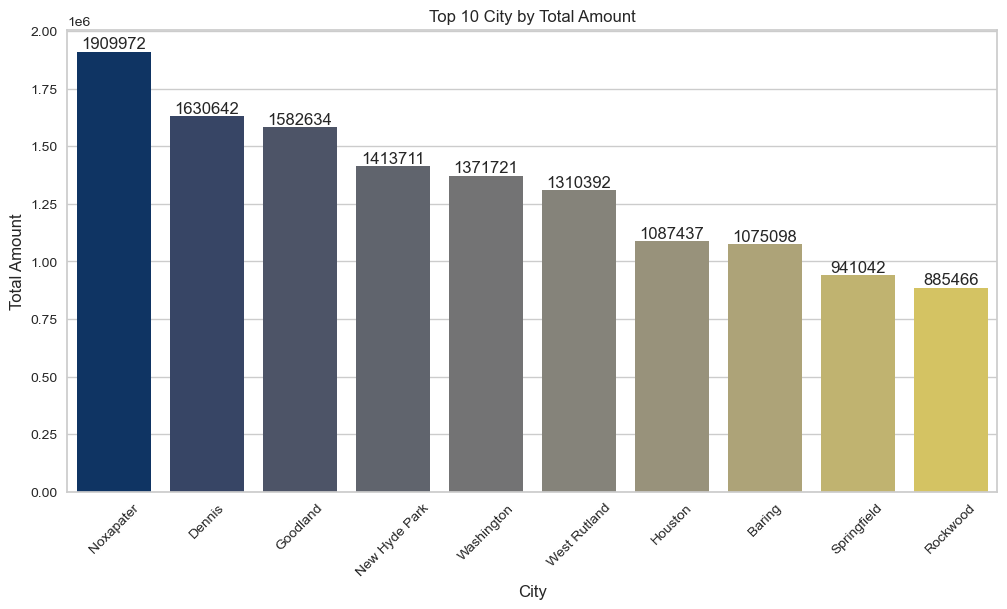

In [17]:
plt.figure(figsize=(12, 6))
# Group by "State" and sum the "Total" column
state_total = df.groupby("City")["Total"].sum().reset_index()
# Sort the DataFrame in descending order based on the "Total" column
state_total = state_total.sort_values(by="Total", ascending=False)
# Select the top 10 states
top_10_states = state_total.head(10)
# Create a bar plot for the top 10 states
sns.barplot(x="City", y="Total", data=top_10_states, palette="cividis")
# Add labels to the bars
for i, value in enumerate(top_10_states['Total']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.title("Top 10 City by Total Amount")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()

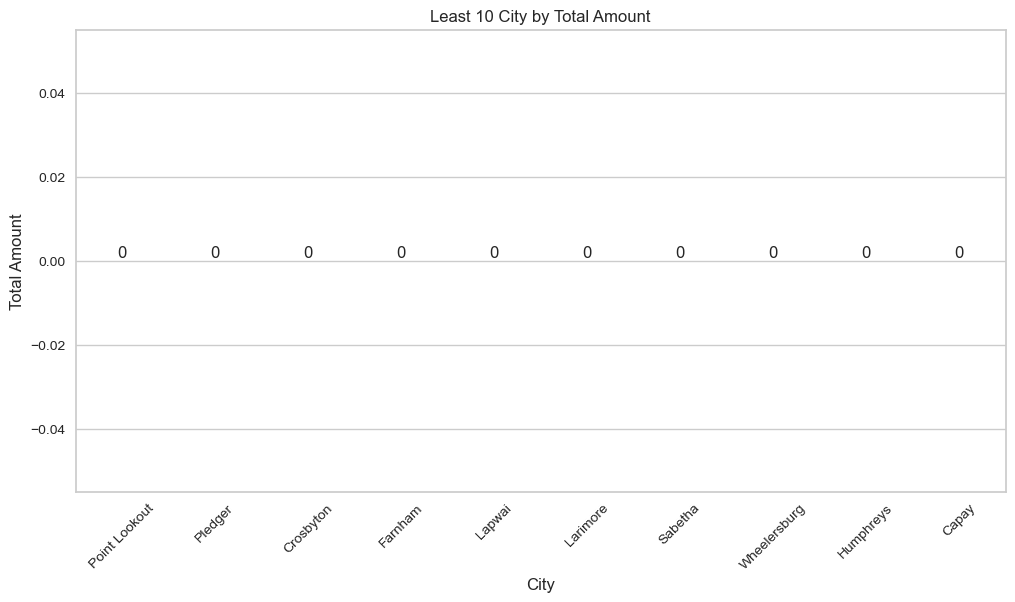

In [18]:
plt.figure(figsize=(12, 6))
# Group by "State" and sum the "Total" column
state_total = df.groupby("City")["Total"].sum().reset_index()
# Sort the DataFrame in descending order based on the "Total" column
state_total = state_total.sort_values(by="Total", ascending=False)
# Select the top 10 states
top_10_states = state_total.tail(10)
# Create a bar plot for the top 10 states
sns.barplot(x="City", y="Total", data=top_10_states, palette="cividis")
# Add labels to the bars
for i, value in enumerate(top_10_states['Total']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.title("Least 10 City by Total Amount")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()

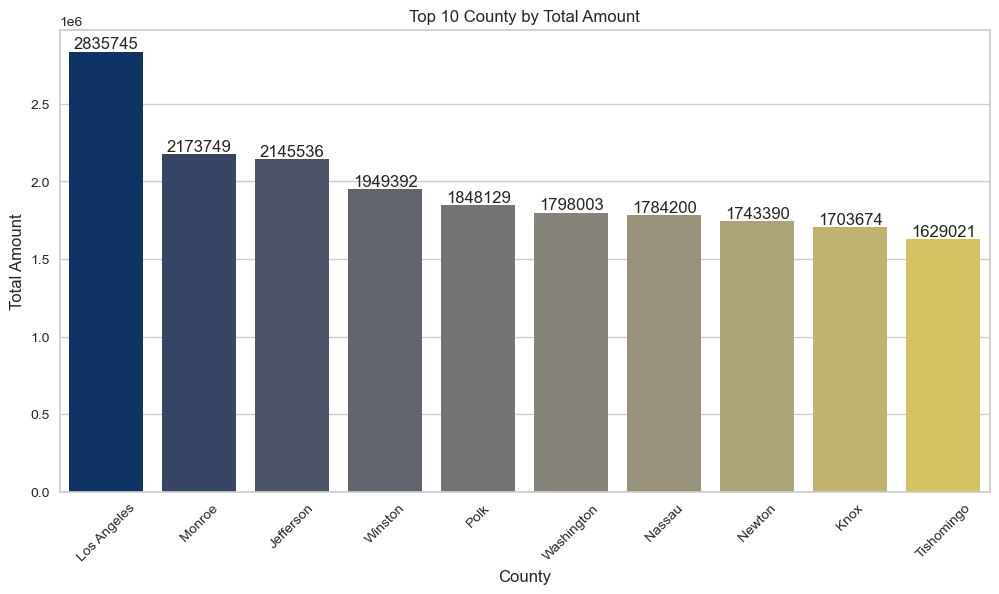

In [19]:
plt.figure(figsize=(12, 6))
# Group by "State" and sum the "Total" column
state_total = df.groupby("County")["Total"].sum().reset_index()
# Sort the DataFrame in descending order based on the "Total" column
state_total = state_total.sort_values(by="Total", ascending=False)
# Select the top 10 states
top_10_states = state_total.head(10)
# Create a bar plot for the top 10 states
sns.barplot(x="County", y="Total", data=top_10_states, palette="cividis")
# Add labels to the bars
for i, value in enumerate(top_10_states['Total']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.title("Top 10 County by Total Amount")
plt.xlabel("County")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()

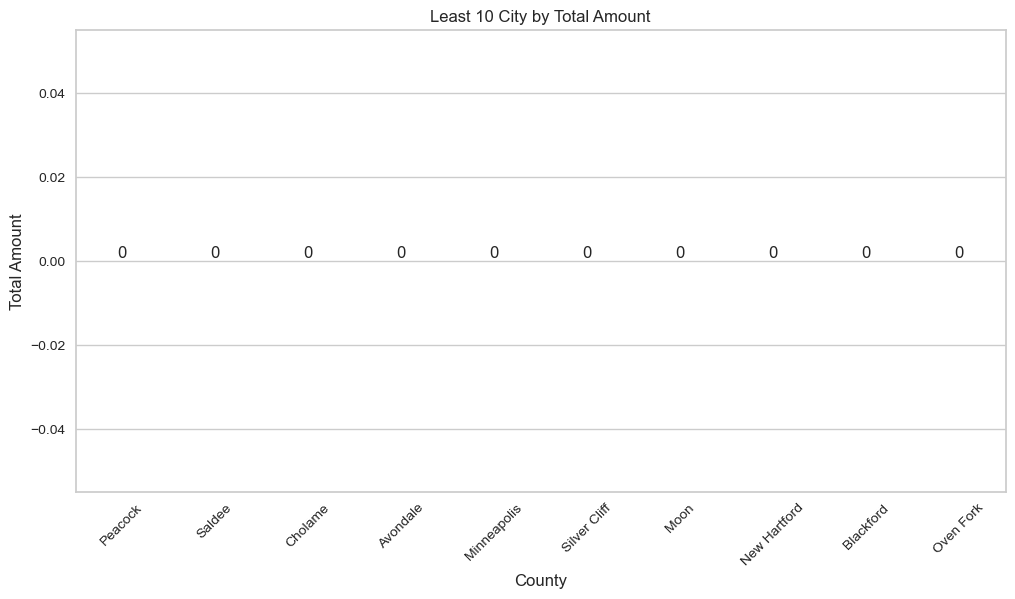

In [20]:
plt.figure(figsize=(12, 6))
# Group by "State" and sum the "Total" column
state_total = df.groupby("County")["Total"].sum().reset_index()
# Sort the DataFrame in descending order based on the "Total" column
state_total = state_total.sort_values(by="Total", ascending=False)
# Select the top 10 states
top_10_states = state_total.tail(10)
# Create a bar plot for the top 10 states
sns.barplot(x="County", y="Total", data=top_10_states, palette="cividis")
# Add labels to the bars
for i, value in enumerate(top_10_states['Total']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.title("Least 10 City by Total Amount")
plt.xlabel("County")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()

### Data Preprocessing

In [21]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [22]:
df.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9


In [23]:
df.drop(["Cust Id","Item Id","Order Id","User Name","Customer Since","Date of Order","Full Name","Ref Num","Zip","County","City","Region","State","Gender","Payment Method","Place Name"], axis=1, inplace=True)
df.head()

,Category,Qty Ordered,Total
0,Health & Sports,3,32.0
1,Men's Fashion,2,74.8
2,Men's Fashion,2,74.9
3,Computing,2,6822.9
4,Entertainment,2,2849.9


### Normalizing the Data

In [24]:
#label encoding (will make the categorical data a numerical dtype, int/float)
# method to use if the dataset contains object data type
#looping through the data to Normalize and Standardize
encoder= LabelEncoder()
for c in df.columns[0:]:
    if(df[c].dtype=="object"):
        df[c]= encoder.fit_transform(df[c])
    else:
        df[c]=df[c]
df.head()

,Category,Qty Ordered,Total
0,5,3,32.0
1,8,2,74.8
2,8,2,74.9
3,3,2,6822.9
4,4,2,2849.9


In [25]:
df.dtypes

Category         int32
Qty Ordered      int64
Total          float64
dtype: object

### Standardizing the Data

In [26]:
# normalize data (will make the data machine learning dtype)(Output in a dataframe)
scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Category,Qty Ordered,Total
0,-0.560675,-0.001805,-0.394846
1,0.141638,-0.220853,-0.373297
2,0.141638,-0.220853,-0.373247
3,-1.028883,-0.220853,3.024241
4,-0.794779,-0.220853,1.023912


In [27]:
df1 =df

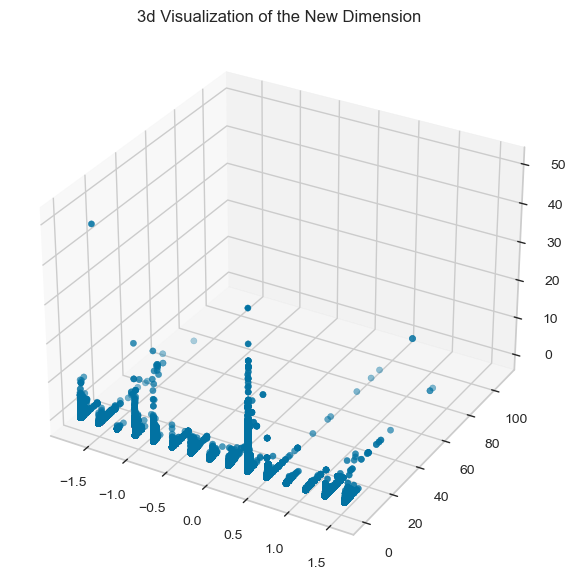

In [28]:
# visualise the new data dimensions
x = df1["Category"]
y = df1["Qty Ordered"]
z = df1["Total"]

fig = plt.figure(figsize=(10,7))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("3d Visualization of the New Dimension");

### Method 1 : Kmeans() with KElbowVisualizer() for Clustering

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

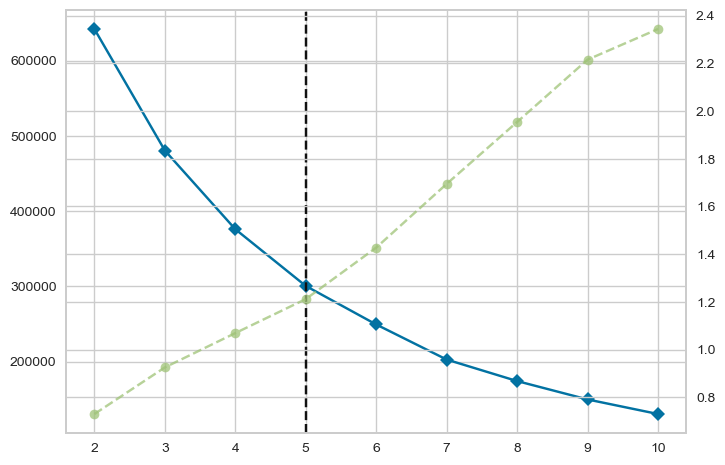

In [29]:
# clustering section
# using the k elbow method to figure the appropriate number of clusters

elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(df1)


In [30]:
# Apply Kmeans Clustering
kmeans = KMeans(n_clusters=5,random_state=42)
y_means= kmeans.fit_predict(df1)
df1["clusters"] = y_means
df["clusters"] = y_means

In [31]:
df1.head(3)

,Category,Qty Ordered,Total,clusters
0,-0.560675,-0.001805,-0.394846,1
1,0.141638,-0.220853,-0.373297,2
2,0.141638,-0.220853,-0.373247,2


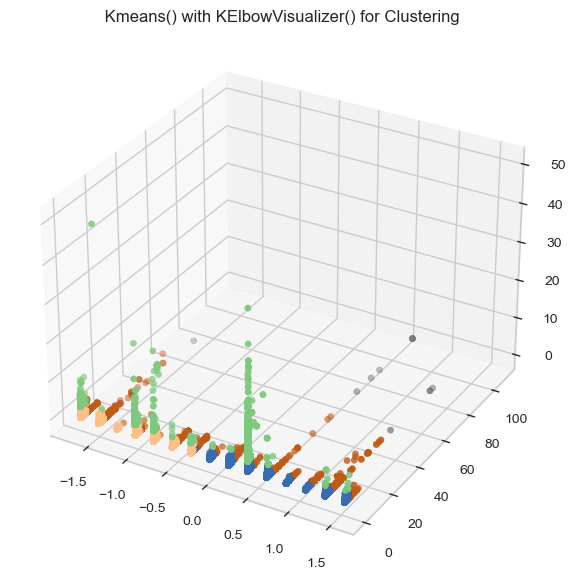

In [32]:
# plotting new data points
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=df1["clusters"],marker="o", cmap=cmap)
ax.set_title(" Kmeans() with KElbowVisualizer() for Clustering");

### Visualization After Clustering

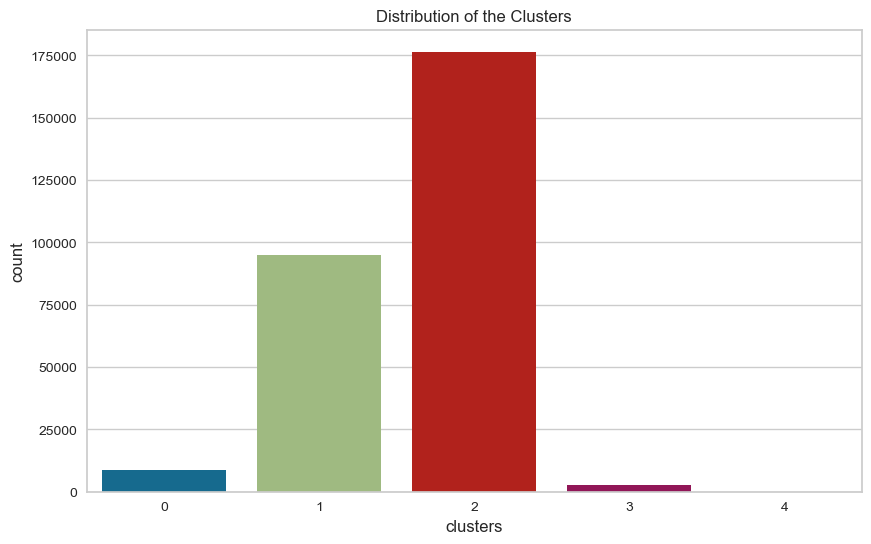

In [33]:
# plot the clusters on a ber viuslization
plt.figure(figsize=(10,6))
sns.countplot(x = df1.clusters)
plt.title("Distribution of the Clusters");

### Quantity Order and Category

In [34]:
df.columns

Index(['Category', 'Qty Ordered', 'Total', 'clusters'], dtype='object')

In [35]:
a=df.groupby("clusters")["Qty Ordered"].sum().reset_index()
a

,clusters,Qty Ordered
0,0,-514.744865
1,1,-10832.137210
2,2,-5290.924624
3,3,15517.616153
4,4,1120.190547


In [36]:
#sns.boxplot(x="clusters", y="Total", data=df);

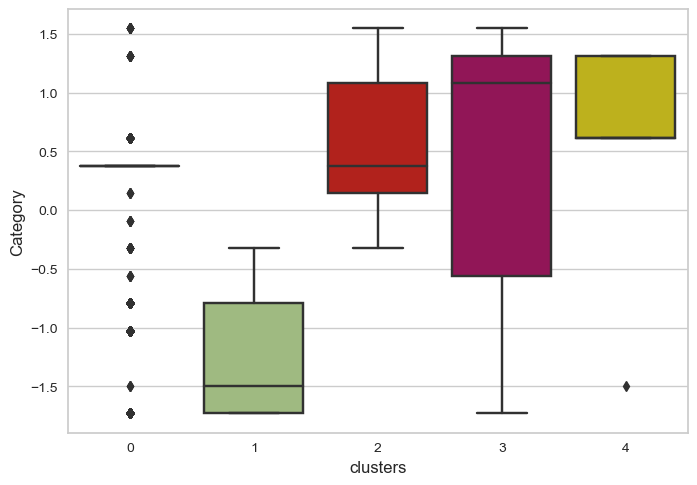

In [37]:
sns.boxplot(x="clusters", y="Category", data=df);

### Recomendation

I highly recommend this comprehensive e-commerce strategy study. Leveraging advanced machine learning algorithms for customer segmentation and data analysis is pivotal in today's competitive e-commerce landscape. By aligning marketing efforts with customer preferences and desires, this approach promises to enhance market presence and drive substantial sales growth. It's a strategic move towards delivering precisely what customers want and staying ahead in the evolving e-commerce industry.